# Diseño Experimental

inicio

## Codigo

### Instalación de librerías

In [3]:
# pip install sinfo
# pip install pingouin

### Importación librerías

In [4]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
import pingouin as pg

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from sinfo import sinfo

### Lectura de archivos

#### Lectura - Cultivos y productos de ganadería (QCL)

In [5]:
# Cultivos y productos de ganadería (QLC)
# https://www.fao.org/faostat/es/#data/QCL

df_qcl_all = pd.read_csv('data/qcl_cultivos-y-productos-de-ganadería.csv', low_memory=False)

df_qcl_all.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código del producto (CPC),Producto,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo,Nota
0,QCL,Cultivos y productos de ganadería,188,Costa Rica,5312,Área cosechada,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,ha,500.0,E,Valor estimado,NaN
1,QCL,Cultivos y productos de ganadería,188,Costa Rica,5419,Rendimiento,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,100 g/ha,10400.0,E,Valor estimado,NaN
2,QCL,Cultivos y productos de ganadería,188,Costa Rica,5510,Producción,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,toneladas,520.0,X,Cifra de fuentes internacionales,Cifras no oficiales
3,QCL,Cultivos y productos de ganadería,188,Costa Rica,5312,Área cosechada,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,ha,700.0,E,Valor estimado,NaN
4,QCL,Cultivos y productos de ganadería,188,Costa Rica,5419,Rendimiento,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,100 g/ha,10357.0,E,Valor estimado,NaN


#### Lectura - Cultivos y productos de ganadería (TLC)


In [6]:
# Cultivos y productos de ganadería (TLC)
# https://www.fao.org/faostat/es/#data/TCL

df_tlc_all = pd.read_csv('data/tlc_cultivos-y-productos-de-ganadería.csv', low_memory=False)

df_tlc_all.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código del producto (CPC),Producto,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo,Nota
0,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,toneladas,87.0,A,Cifra oficial,NaN
1,TCL,Cultivos y productos de ganadería,188,Costa Rica,5922,Exportaciones Valor,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,1000 US$,20.0,A,Cifra oficial,NaN
2,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,toneladas,182.0,A,Cifra oficial,NaN
3,TCL,Cultivos y productos de ganadería,188,Costa Rica,5922,Exportaciones Valor,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,1000 US$,42.0,A,Cifra oficial,NaN
4,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1963,1963,toneladas,35.0,A,Cifra oficial,NaN


#### Lectura - Uso de la tierra (RL)

In [7]:
# Uso de la tierra (RL)
# https://www.fao.org/faostat/es/#data/RL

df_rl_all = pd.read_csv('data/rl_uso-de-la-tierra.csv', low_memory=False)

df_rl_all.head()



tipos = df_rl_all['Elemento'].unique()

print(tipos)

['Superficie' 'Proporción de superficie de tierra'
 'Proporción de tierras agrícolas' 'Superficie per cápita'
 'Existencias de carbono en la biomasa viva'
 'Proporción de tierras destinadas a bosques'
 'Proporción de tierras de cultivo']


#### Lectura - Variación de temperatura de la superficie terrestre (ET)

In [8]:
# Variación de temperatura de la superficie terrestre (ET)
# https://www.fao.org/faostat/es/#data/ET

df_et_all = pd.read_csv('data/et_variación-de-temperatura-de-la-superficie-terrestre.csv', low_memory=False)

df_et_all.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código Meses,Meses,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo
0,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1961,1961,°C,0.866,E,Valor estimado
1,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1962,1962,°C,-0.322,E,Valor estimado
2,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1963,1963,°C,-0.411,E,Valor estimado
3,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1964,1964,°C,0.800,E,Valor estimado
4,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1965,1965,°C,0.011,E,Valor estimado


#### Lectura - Indicadores de precipitaciones a nivel subnacional (rainfall)

In [9]:
# Indicadores de precipitaciones a nivel subnacional (rainfall)
# https://data.humdata.org/dataset/cri-rainfall-subnational

df_rainfall_all = pd.read_csv('data/cri-rainfall-adm2-full.csv', low_memory=False)

df_rainfall_all.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,#date,#adm2+id,#adm2+code,#indicator+n_pixels+num,#indicator+rfh+num,#indicator+rfh_avg+num,#indicator+r1h+num,#indicator+r1h_avg+num,#indicator+r3h+num,#indicator+r3h_avg+num,#indicator+rfq+pct,#indicator+r1q+pct,#indicator+r3q+pct,#status
1,1981-01-01,14508,CR406,1.0,29.0,34.6333,NaN,NaN,NaN,NaN,85.7864,NaN,NaN,final
2,1981-01-11,14508,CR406,1.0,27.0,26.1,NaN,NaN,NaN,NaN,102.8939,NaN,NaN,final
3,1981-01-21,14508,CR406,1.0,18.0,24.1667,74.0,84.9,NaN,NaN,78.8571,88.5142,NaN,final
4,1981-02-01,14508,CR406,1.0,17.0,17.7,62.0,67.9667,NaN,NaN,96.9163,92.3472,NaN,final


#### Lectura - Indicadores de Precipitation Media (PR)

In [10]:
# Indicadores de precipitation media (PR)
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_pr_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

df_pr_all = pd.read_excel('data/pr_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
df_pr_all.head()

,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,38.40,72.03,149.35,6.83,188.00,342.54,587.20,417.28,...,107.73,144.08,360.60,481.42,239.83,264.82,369.99,332.68,301.97,108.55
1,CRI.61981,Alajuela,46.47,76.80,122.70,2.60,148.21,357.01,692.00,440.42,...,90.33,92.70,293.51,511.80,279.11,283.84,356.88,299.65,297.45,136.31
2,CRI.61982,Cartago,56.68,116.36,244.44,3.99,218.25,387.06,641.32,463.53,...,173.54,204.50,449.33,540.98,257.26,284.44,384.83,338.41,354.28,153.91
3,CRI.61983,Guanacaste,10.88,15.49,28.48,3.43,145.17,292.74,384.07,307.75,...,22.07,41.20,233.10,404.06,166.26,205.95,376.92,303.21,161.42,41.55
4,CRI.61984,Heredia,74.09,133.57,227.31,3.71,183.62,395.65,850.99,493.18,...,164.96,187.45,442.56,586.40,334.48,322.42,344.67,315.48,446.18,200.40


#### Lectura - Indicadores de Average Mean Surface Air Temperature (TAS)        

In [11]:
# Indicadores de Average Mean Surface Air Temperature (TAS)
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tas_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

df_tas_all = pd.read_excel('data/tas_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
df_tas_all.head()

,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,23.74,24.22,25.04,25.46,24.98,24.33,24.37,24.23,...,25.56,25.73,25.43,24.04,25.01,24.52,24.34,24.61,23.72,24.21
1,CRI.61981,Alajuela,24.54,25.15,26.20,26.75,25.85,25.03,25.09,24.93,...,26.80,27.06,26.34,24.81,25.80,25.23,25.12,25.47,24.50,25.07
2,CRI.61982,Cartago,18.16,18.31,19.07,19.56,19.75,19.56,19.50,19.54,...,19.58,19.76,20.16,19.16,20.08,19.84,19.70,19.75,18.88,18.97
3,CRI.61983,Guanacaste,26.36,27.16,27.60,27.95,27.30,26.56,26.51,26.43,...,28.20,28.31,27.78,26.42,27.30,26.72,26.60,26.96,26.31,26.92
4,CRI.61984,Heredia,23.74,24.22,25.37,25.97,25.29,24.43,24.65,24.39,...,25.97,26.25,25.79,24.17,25.31,24.69,24.52,24.84,23.72,24.28


#### Lectura - Indicadores de Average Maximum Surface Air Temperature (TASMAX)

In [12]:
# Indicadores de Average Maximum Surface Air Temperature (TASMAX)
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tasmax_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

df_tasmax_all = pd.read_excel('data/tasmax_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
df_tasmax_all.head()

,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,27.66,28.48,29.40,29.64,28.80,27.97,27.90,27.82,...,29.92,29.91,29.25,27.68,28.54,28.10,27.83,28.27,27.40,27.96
1,CRI.61981,Alajuela,28.55,29.52,30.71,31.06,29.77,28.73,28.70,28.63,...,31.30,31.38,30.26,28.51,29.41,28.93,28.69,29.22,28.31,28.92
2,CRI.61982,Cartago,22.21,22.73,23.61,23.98,23.82,23.35,23.10,23.24,...,24.12,24.18,24.23,22.96,23.69,23.54,23.32,23.55,22.66,22.85
3,CRI.61983,Guanacaste,30.71,31.86,32.36,32.45,31.32,30.46,30.34,30.30,...,32.96,32.81,31.79,30.32,31.13,30.60,30.28,30.85,30.34,31.05
4,CRI.61984,Heredia,27.47,28.31,29.59,30.04,29.04,27.94,28.07,27.90,...,30.18,30.32,29.54,27.68,28.72,28.20,27.93,28.45,27.29,27.88


#### Lectura - Indicadores de Average Minimum Surface Air Temperature (TASMIN)

In [13]:
# Indicadores de Average Minimum Surface Air Temperature (TASMIN)
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tasmin_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

df_tasmin_all = pd.read_excel('data/tasmin_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
df_tasmin_all.head()

,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,19.87,20.00,20.73,21.32,21.20,20.74,20.91,20.70,...,21.25,21.59,21.65,20.45,21.55,20.99,20.91,20.99,20.09,20.51
1,CRI.61981,Alajuela,20.55,20.83,21.76,22.50,21.98,21.34,21.52,21.31,...,22.35,22.82,22.47,21.13,22.24,21.61,21.62,21.77,20.76,21.28
2,CRI.61982,Cartago,14.19,13.95,14.54,15.21,15.71,15.86,16.00,15.94,...,15.05,15.41,16.12,15.46,16.58,16.24,16.10,16.02,15.18,15.19
3,CRI.61983,Guanacaste,22.06,22.52,22.86,23.48,23.31,22.71,22.74,22.59,...,23.46,23.84,23.78,22.57,23.53,22.88,22.99,23.10,22.32,22.83
4,CRI.61984,Heredia,20.03,20.18,21.20,21.98,21.60,20.91,21.29,20.97,...,21.80,22.26,22.10,20.65,21.95,21.27,21.16,21.28,20.20,20.73


### Limpieza de datos

## Graficos

                            OLS Regression Results                            
Dep. Variable:                 CMObra   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     44.69
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           4.55e-05
Time:                        01:28:17   Log-Likelihood:                -86.909
No. Observations:                  11   AIC:                             179.8
Df Residuals:                       8   BIC:                             181.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2528.2400   2096.232     -1.206   

,0%,95%
Intercept,-7362.160243,2305.680269
NumEmpleados,418.754382,2609.166250
HTrabajadas,-27.327531,28.603914


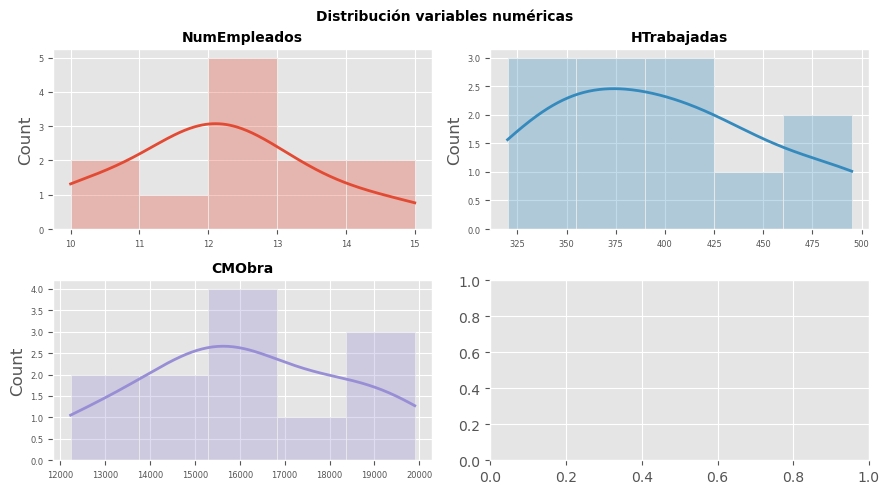

In [14]:
# Regresion lineal multiple


NumEmpleados =	[14,	12,	10,	13,	12,	12,	13,	15,	12,	12,	10, 11.]
HTrabajadas =	[490,	420,	330,	442,	360,	372,	416,	495,	408,	372,	320, 350.]
CMObra=	[18511,	15920,	12233,	18111,	14991,	15972,	18968,	19897,	15763,	15884,	13148, 14348.70]

datos = pd.DataFrame({ 'NumEmpleados': NumEmpleados, 'HTrabajadas':HTrabajadas, 'CMObra': CMObra})

# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# División de los datos en train y test
# ==============================================================================
X = datos[['NumEmpleados','HTrabajadas' ]]
y = datos['CMObra']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.95,
                                        # buscar la explicaión
                                        random_state = 56,
                                        shuffle      = True
                                    )
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
datos_train = pd.DataFrame(
                     np.hstack((X_train, y_train)),
                     columns=['NumEmpleados', 'HTrabajadas', 'CMObra']
               )
modelo = smf.ols(formula = 'CMObra ~ NumEmpleados + HTrabajadas', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['0%', '95%']
intervalos_ci



In [36]:
# Regresion lineal multiple

Htac =	[45,	42,	44,	45,	43,	46,	44,	45,	44,	43,	43.]
Hc =	[16,	14,	15,	13,	13,	14,	16,	16,	15,	15,	16.]
Ipd =	[29,	24	,27,	25,	26,	28,	30,	28,	28,	27,	28.0009]

datos = pd.DataFrame({ 'Htac': Htac, 'Hc':Hc, 'Ipd': Ipd})

# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
# axes = axes.flat
# columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

# for i, colum in enumerate(columnas_numeric):
#     sns.histplot(
#         data    = datos,
#         x       = colum,
#         stat    = "count",
#         kde     = True,
#         color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
#         line_kws= {'linewidth': 2},
#         alpha   = 0.3,
#         ax      = axes[i]
#     )
#     axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
#     axes[i].tick_params(labelsize = 6)
#     axes[i].set_xlabel("")


    
# fig.tight_layout()
# plt.subplots_adjust(top = 0.9)
# fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# División de los datos en train y test
# ==============================================================================
X = datos[['Htac', 'Hc',  ]]
y = datos['Ipd']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.95,
# aun no lo logro entender el siguiente paso
                                        random_state = 83, 
                                        shuffle      = True
                                    )
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                       np.hstack((X_train, y_train)),
#                       columns=['Htac', 'Hc', 'Ipd']
#                 )
modelo = smf.ols(formula = 'Ipd ~ Htac + Hc', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

# X_train = sm.add_constant(X_train, prepend=True)
# modelo  = sm.OLS(endog=y_train, exog=X_train,)
# modelo  = modelo.fit()
# print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ipd   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     9.411
Date:                Tue, 11 Jun 2024   Prob (F-statistic):             0.0104
Time:                        01:53:59   Log-Likelihood:                -13.089
No. Observations:                  10   AIC:                             32.18
Df Residuals:                       7   BIC:                             33.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.8196     13.323     -1.037      0.3

In [48]:
# ANOVA

# Generar datos de ejemplo
np.random.seed(0)
years = np.arange(2000, 2022)
temperature = np.random.uniform(25, 30, size=len(years))  # Temperatura en grados Celsius
precipitation = np.random.uniform(100, 300, size=len(years))  # Precipitación en mm
production = 500 + 10*temperature - 2*precipitation + np.random.normal(0, 20, size=len(years))  # Producción en toneladas

# Crear DataFrame
data = pd.DataFrame({
    'Year': years,
    'Temperature': temperature,
    'Precipitation': precipitation,
    'Production': production
})

print (data.head)

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)
 
 # Ajustar el modelo de regresión lineal múltiple
X = data[['Temperature', 'Precipitation', 'Year']]
X = sm.add_constant(X)  # Añadir la constante al modelo
y = data['Production']

# # Crear y resultado del modelo
model = smf.ols('Production ~ Temperature + Precipitation + Year', data=data)
model=model.fit()
print(model.summary())


#ANOVA
print('Análisis de Varianza (ANOVA)')

anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)


# Obtener los coeficientes del modelo
# intercept = model.params['const']
# coef_temperatura = model.params['Temperature']
# coef_precipitacion = model.params['Precipitation']
# coef_año = model.params['Year']

#  #Imprimir la ecuación del modelo
# print("Ecuación del modelo de regresión lineal múltiple:")
# print(f"Production = {intercept:.2f} + {coef_temperature:.2f} * Temper# ature + {coef_precipitation:.2f} * Precipitation + {coef_año:.2f} * Year")

#   # Realizar ANOVA de dos factores
# aov = pg.anova(dv='Production', between=['Temperature', 'Precipitation',], data=data, detailed=True)
# print(aov)

# print('Resultados medios y desviación típica por Temperature y Precipitation')
# data.groupby(['Temperature', 'Precipitation'])['Production'].agg(['mean', 'std'])

# # Obtener el resumen del modelo
# model_summary = model.summary()

# # Obtener el R-cuadrado del modelo
# r_squared = model.rsquared

# # Imprimir el resumen del modelo y el R-cuadrado
# print(model_summary)
# print(f'R-cuadrado: {r_squared}')

# # # Crear el modelo de ANOVA
# model = smf.ols('Producción ~ Temperatura * Precipitación', data=data).fit()

# anova_table = sm.stats.anova_lm(model, typ=2)
# print(anova_table)


# anova_table



<bound method NDFrame.head of     Year  Temperature  Precipitation  Production
0   2000    27.744068     192.295872  417.454744
1   2001    28.575947     256.105835  297.595395
2   2002    28.013817     123.654885  525.081862
3   2003    27.724416     227.984204  315.229696
4   2004    27.118274     128.670657  492.870366
5   2005    28.229471     288.933783  176.026780
6   2006    27.187936     204.369664  329.014628
7   2007    29.458865     182.932388  467.739382
8   2008    29.818314     152.911122  482.167850
9   2009    26.917208     254.846738  250.717114
10  2010    28.958625     191.230066  382.070212
11  2011    27.644475     213.686790  364.620974
12  2012    27.840223     103.757960  538.608351
13  2013    29.627983     223.527099  344.970827
14  2014    25.355180     222.419145  290.804183
15  2015    25.435646     223.386799  315.320916
16  2016    25.101092     288.749616  163.295586
17  2017    29.163099     236.364060  295.290229
18  2018    28.890784     171.901580  4